Name : Trakshay Balagotra

Contact Number : +91 8308103278

Mail ID : trakshay.balagotra@outlook.com

Forage Quantium Data Analytics Task 2 : Experimenting and Uplift Testing


1. Importing the necessary dependencies

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


2. Reading the dataset

In [13]:
data = pd.read_csv('QVI_data.csv')

In [15]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [21]:
data.BRAND.value_counts()

,count
BRAND,
KETTLE,41288
SMITHS,31823
DORITOS,28145
PRINGLES,25102
RRD,17779
WOOLWORTHS,14757
INFUZIONS,14201
THINS,14075
COBS,9693


In [25]:
counts = data.BRAND.value_counts()


colors = px.colors.qualitative.Set1[:len(counts)]

# Create a bar chart using Plotly Express with different colors
fig = px.bar(
    x=counts.index,
    y=counts.values,
    labels={'y': 'Count', 'x':'Brand Name'},
    color=counts.index,
    color_discrete_map={ctype: color for ctype, color in zip(counts.index, colors)},  # Assign custom colors
    title='Count of Brand',
)
for i, count in enumerate(counts.values):
    fig.add_annotation(
        x=counts.index[i],
        y=count,
        text=str(count),
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-20,
    )

# Add a legend
fig.update_layout(legend=dict(title=dict(text='Legend')), height = 1000)

# Show the plot
fig.show()

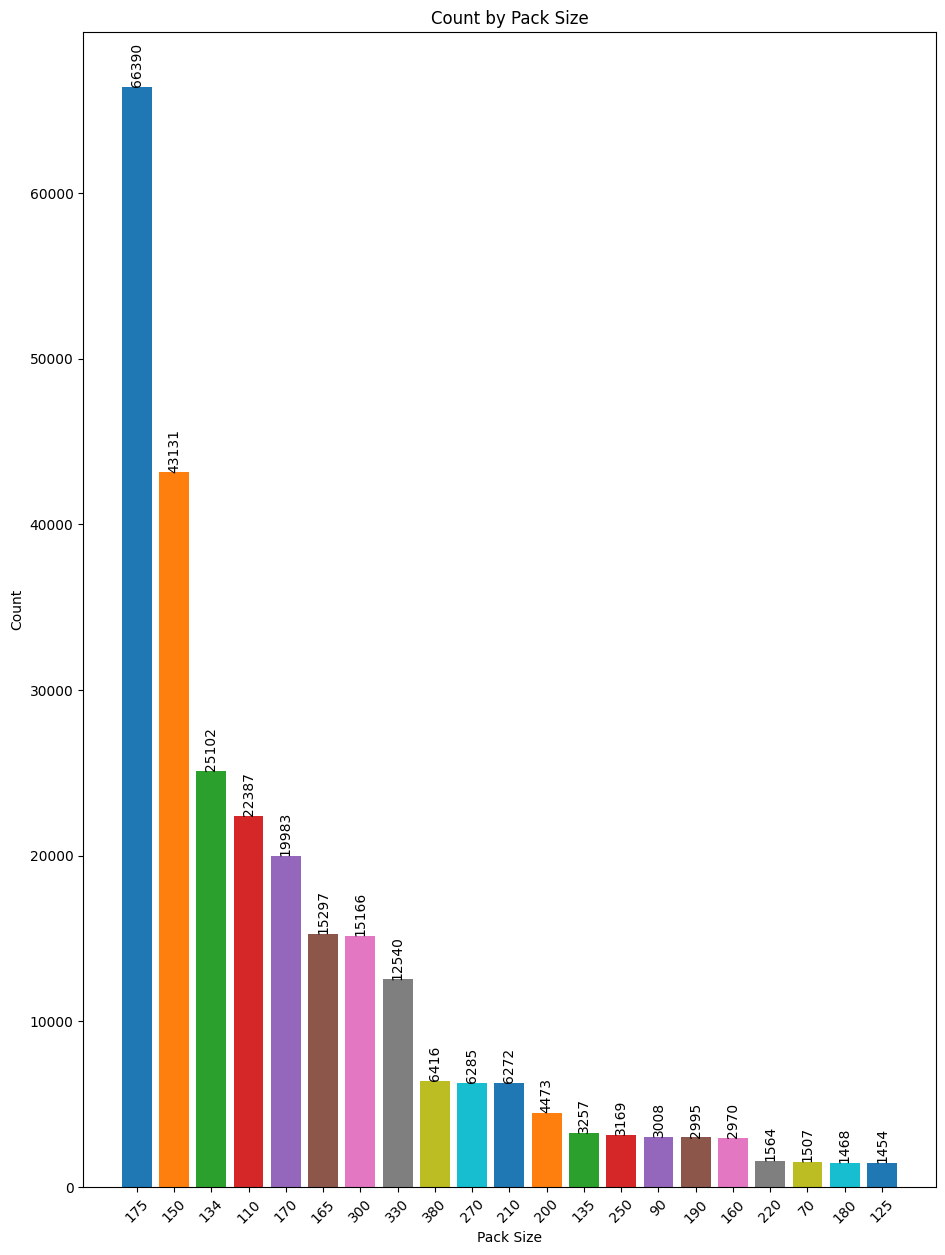

In [26]:
counts = data['PACK_SIZE'].value_counts()

# Plotting the counts
plt.figure(figsize=(11, 15))

for i, (value, count) in enumerate(counts.items()):
    plt.bar(i, count)
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', rotation=90)

plt.title('Count by Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Count')
plt.xticks(range(len(counts)), counts.index, rotation=45)

# Display the plot
plt.show()

In [27]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

In [28]:
#Extracting Year from DATE column
data['Year'] = data['DATE'].dt.year

In [29]:
#Extracting Month_name and Year from DATE column
data['Month_Year'] = data['DATE'].dt.strftime('%B %Y')

In [30]:
#Extracting Month_name from DATE column
data['Month_Name'] = data['DATE'].dt.strftime('%B')

In [31]:
##Extracting Quater from DATE column
data['Quarter'] = data['DATE'].dt.quarter

In [32]:
#Extracting Quater and Year from DATE column
data['Quarter_Year'] = data['DATE'].dt.to_period('Q')

In [33]:
#Extracting WEEKDAY from DATE column
data['Weekday'] = data['DATE'].dt.day_name()

In [34]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Year,Month_Year,Month_Name,Quarter,Quarter_Year,Weekday
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018,October 2018,October,4,2018Q4,Wednesday
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018,September 2018,September,3,2018Q3,Sunday
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019,March 2019,March,1,2019Q1,Thursday
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019,March 2019,March,1,2019Q1,Friday
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018,November 2018,November,4,2018Q4,Friday


In [35]:
#Saving the updated dataset
data.to_csv('updated_data.csv')
data.to_excel('updated_data.xlsx')

In [36]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Year,Month_Year,Month_Name,Quarter,Quarter_Year,Weekday
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018,October 2018,October,4,2018Q4,Wednesday
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018,September 2018,September,3,2018Q3,Sunday
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019,March 2019,March,1,2019Q1,Thursday
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019,March 2019,March,1,2019Q1,Friday
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018,November 2018,November,4,2018Q4,Friday


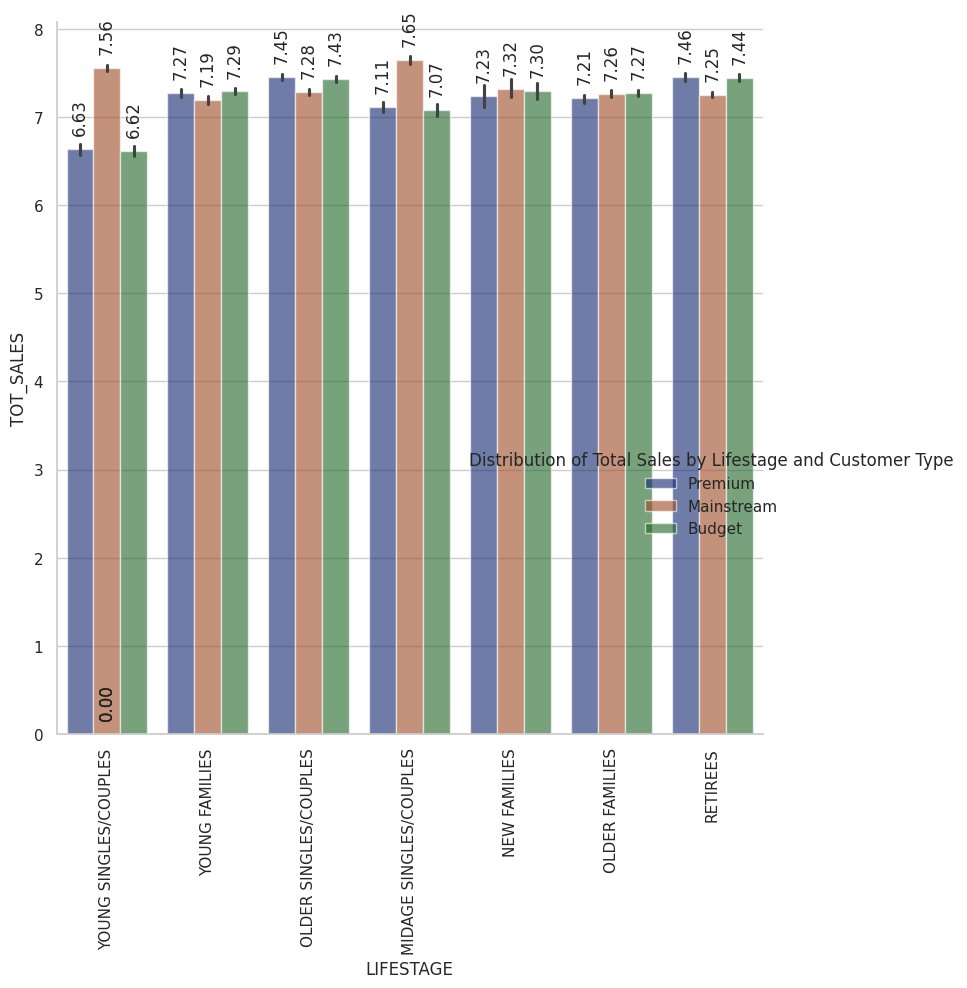

In [37]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("LIFESTAGE", "TOT_SALES")
g.legend.set_title("Distribution of Total Sales by Lifestage and Customer Type")

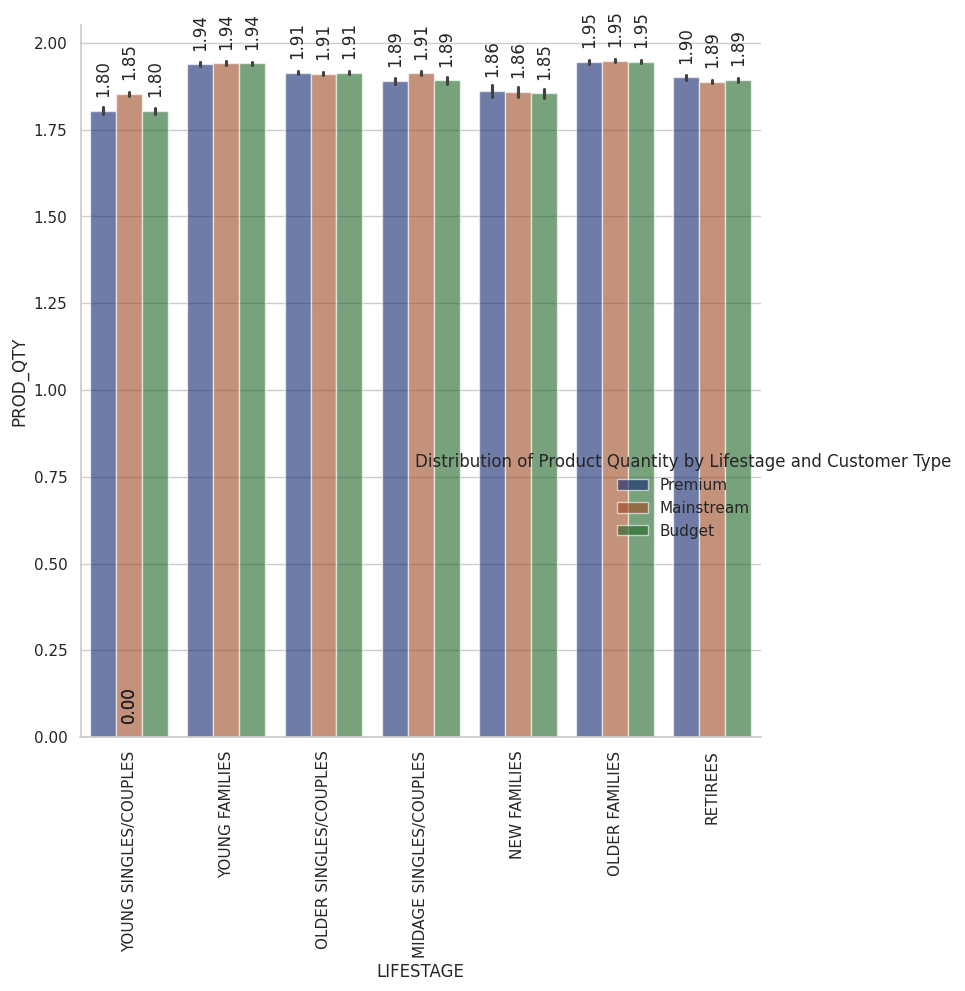

In [38]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="LIFESTAGE", y="PROD_QTY", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("LIFESTAGE", "PROD_QTY")
g.legend.set_title("Distribution of Product Quantity by Lifestage and Customer Type")

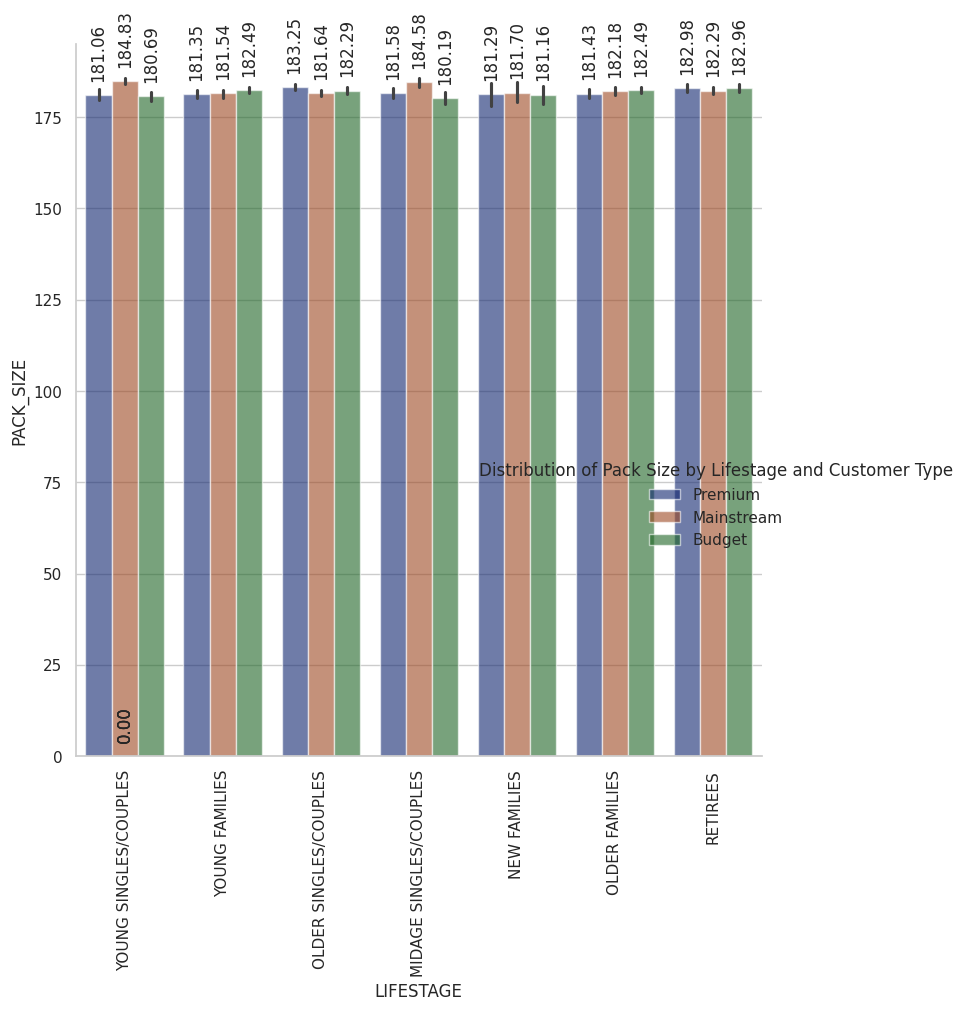

In [39]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="LIFESTAGE", y="PACK_SIZE", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("LIFESTAGE", "PACK_SIZE")
g.legend.set_title("Distribution of Pack Size by Lifestage and Customer Type")

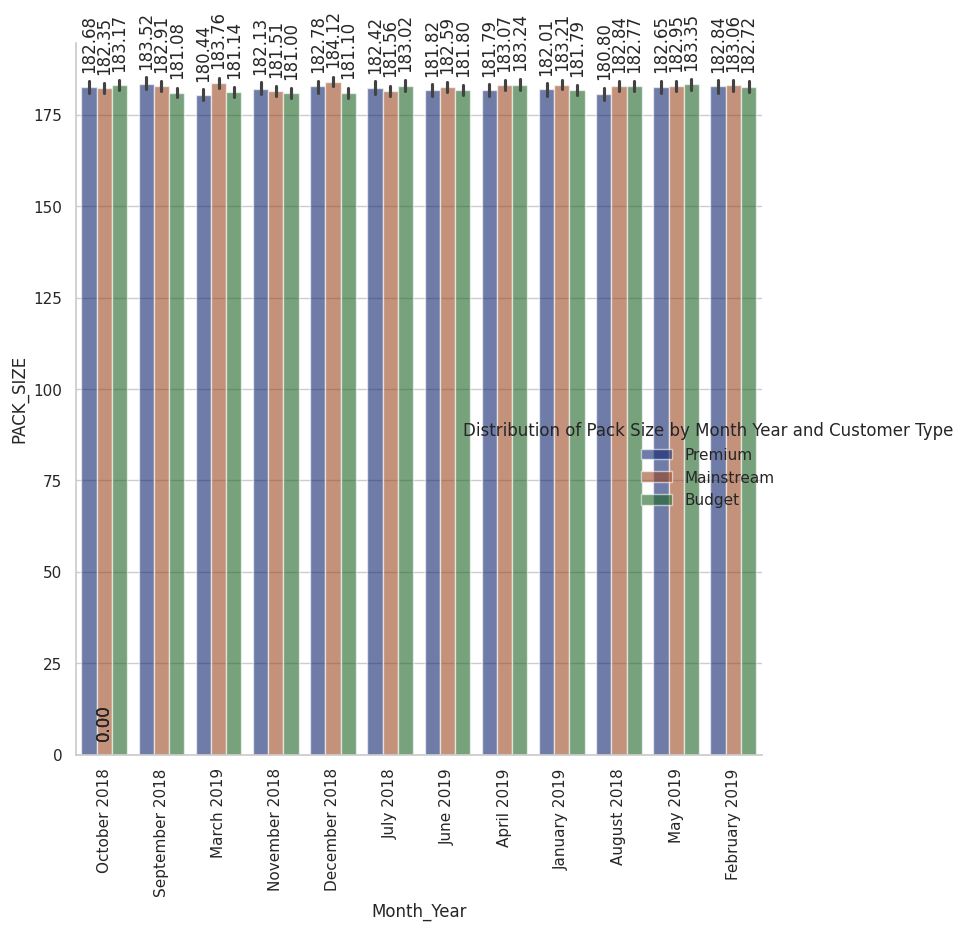

In [40]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Month_Year", y="PACK_SIZE", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Month_Year", "PACK_SIZE")
g.legend.set_title("Distribution of Pack Size by Month Year and Customer Type")

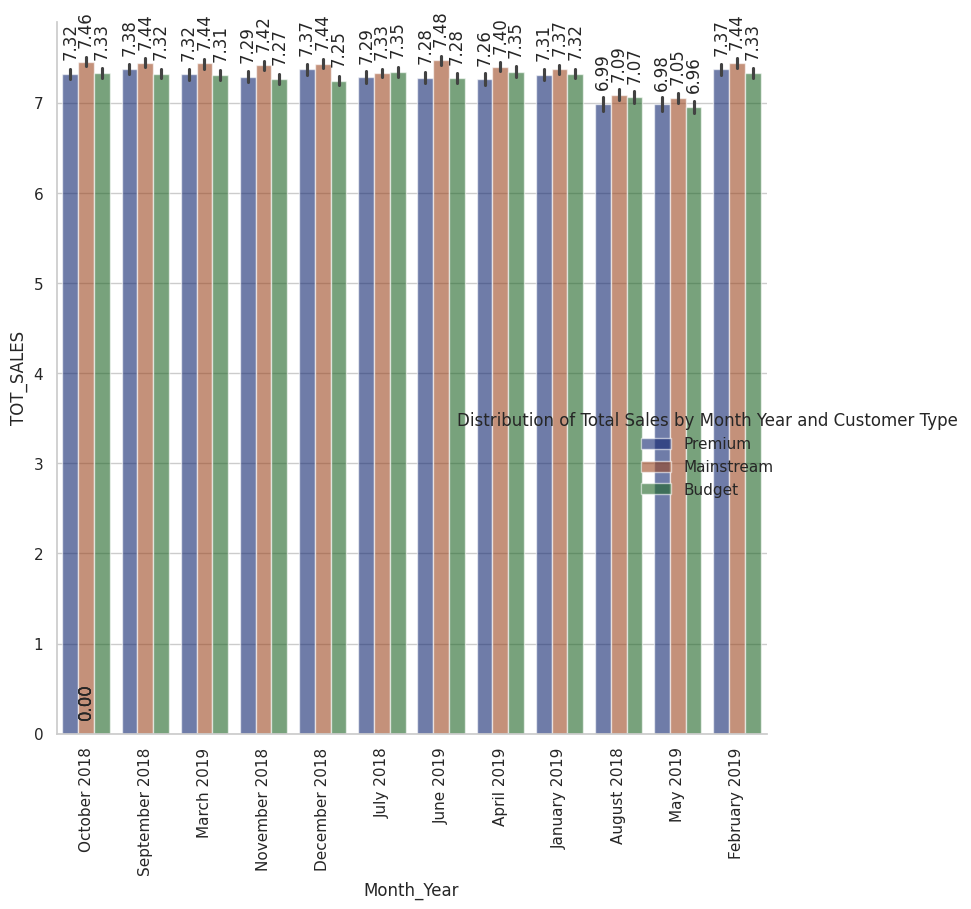

In [41]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Month_Year", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Month_Year", "TOT_SALES")
g.legend.set_title("Distribution of Total Sales by Month Year and Customer Type")

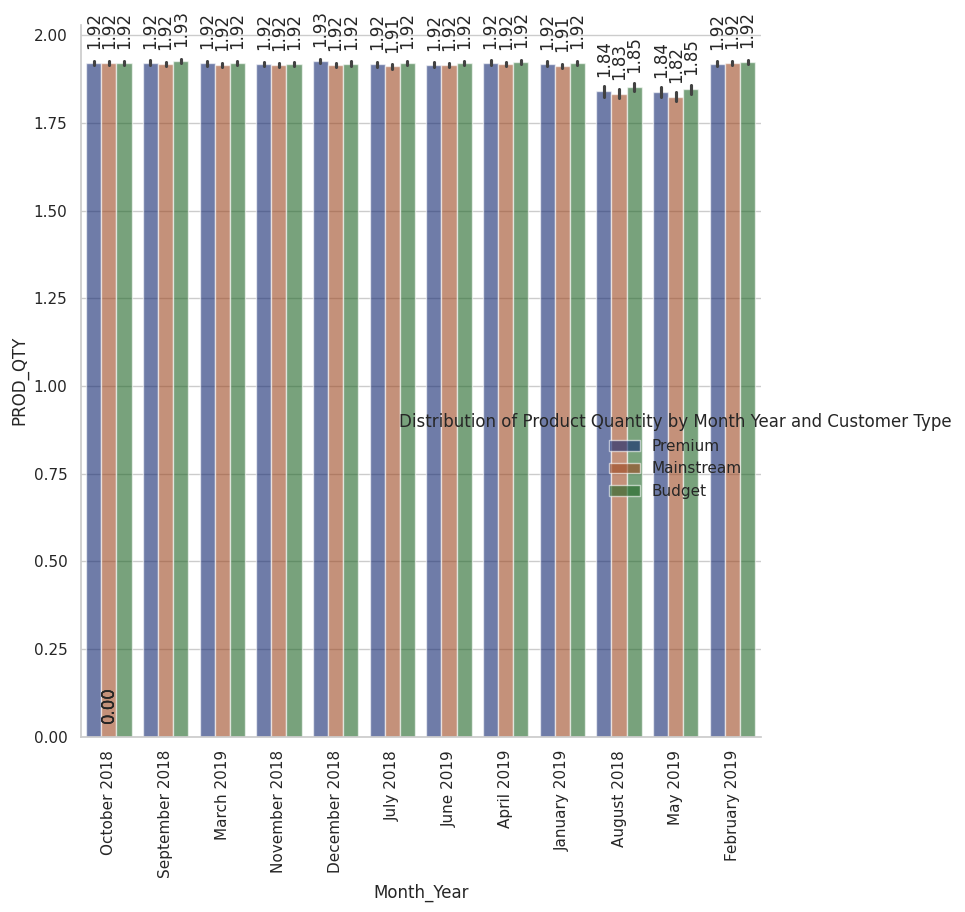

In [43]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Month_Year", y="PROD_QTY", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Month_Year", "PROD_QTY")
g.legend.set_title("Distribution of Product Quantity by Month Year and Customer Type")

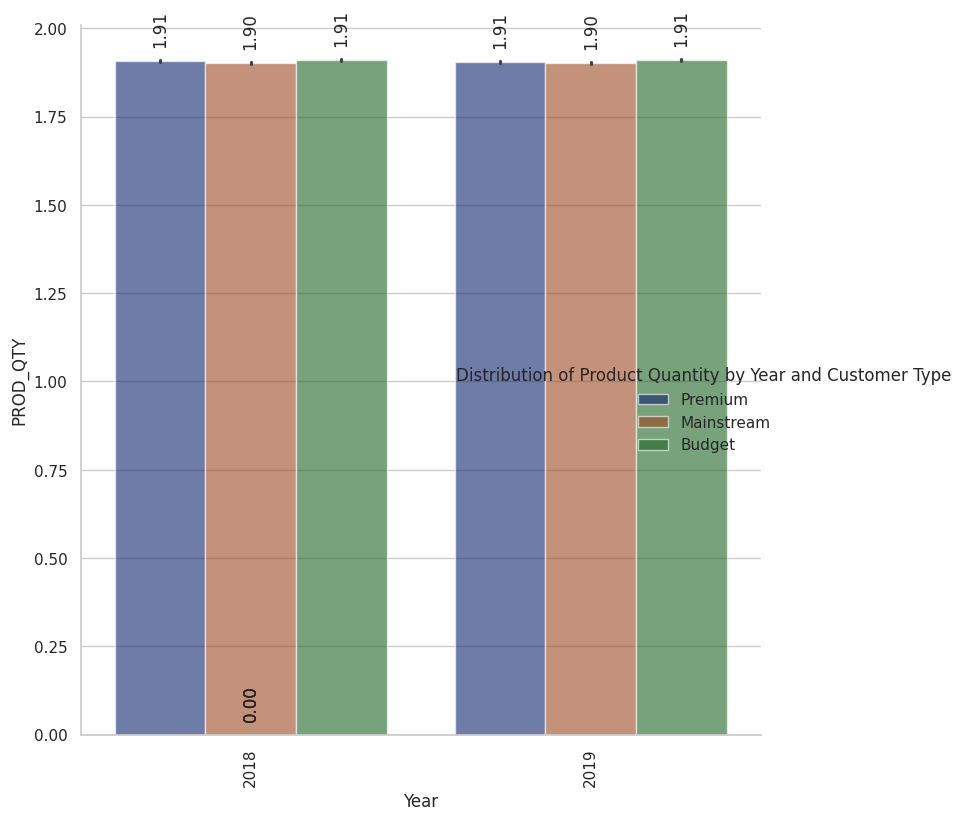

In [44]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Year", y="PROD_QTY", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "PROD_QTY")
g.legend.set_title("Distribution of Product Quantity by Year and Customer Type")

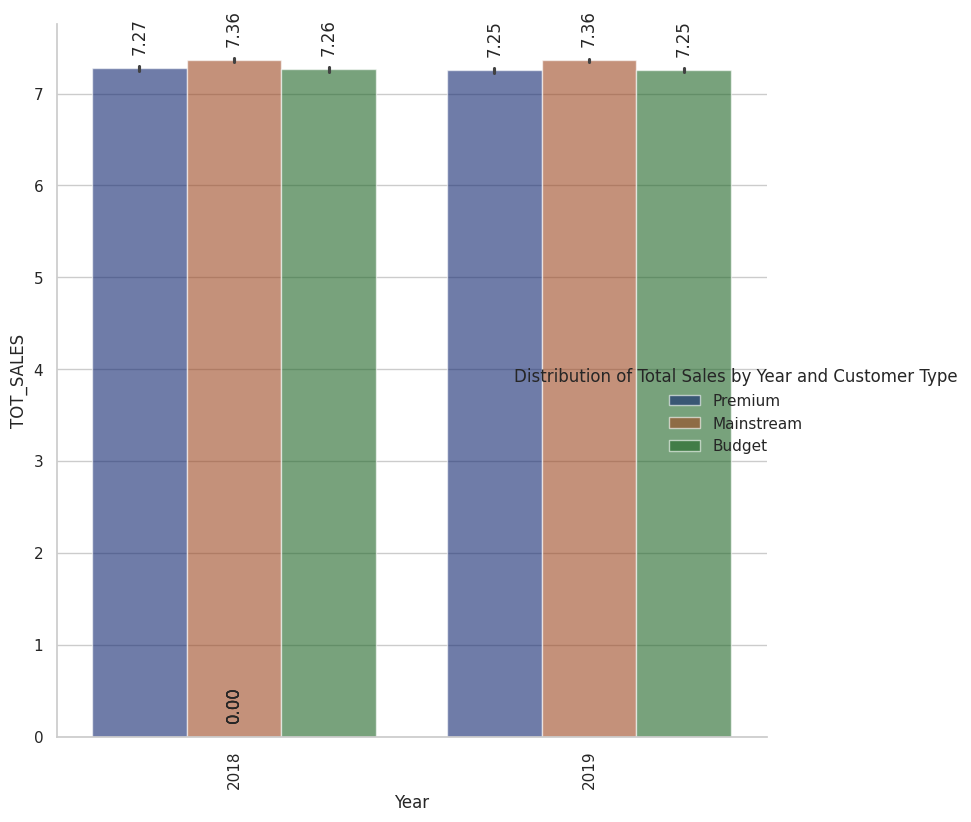

In [45]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Year", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "TOT_SALES")
g.legend.set_title("Distribution of Total Sales by Year and Customer Type")

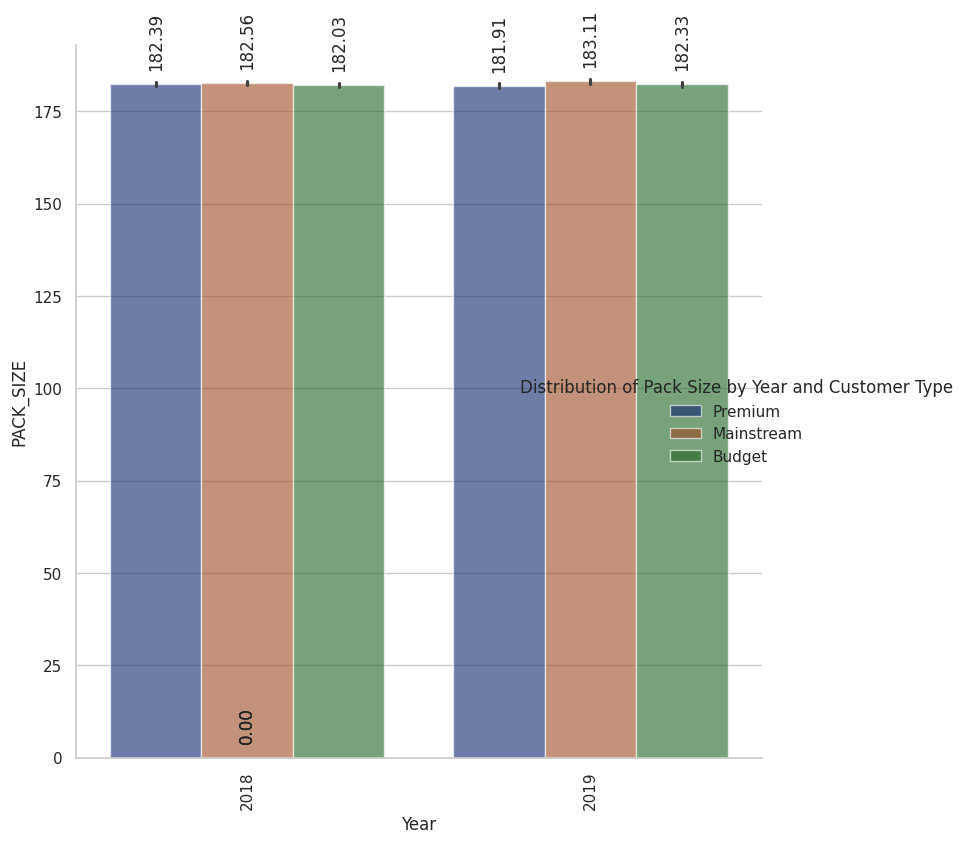

In [46]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Year", y="PACK_SIZE", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "PACK_SIZE")
g.legend.set_title("Distribution of Pack Size by Year and Customer Type")

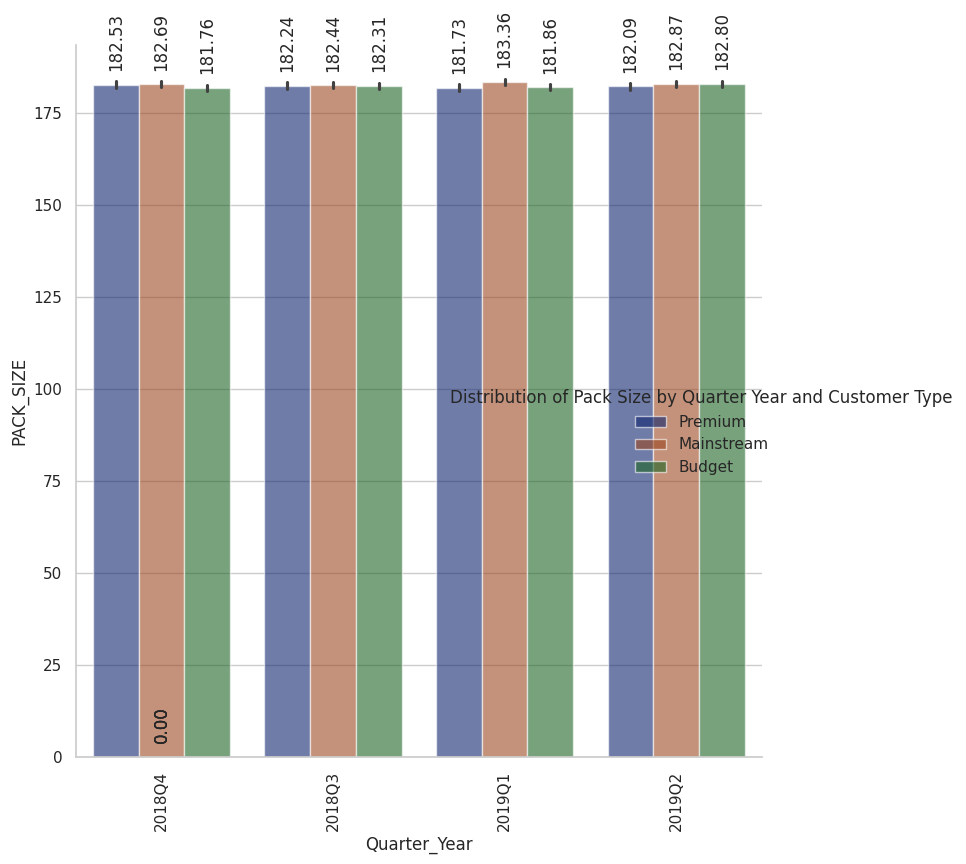

In [47]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Quarter_Year", y="PACK_SIZE", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Quarter_Year", "PACK_SIZE")
g.legend.set_title("Distribution of Pack Size by Quarter Year and Customer Type")

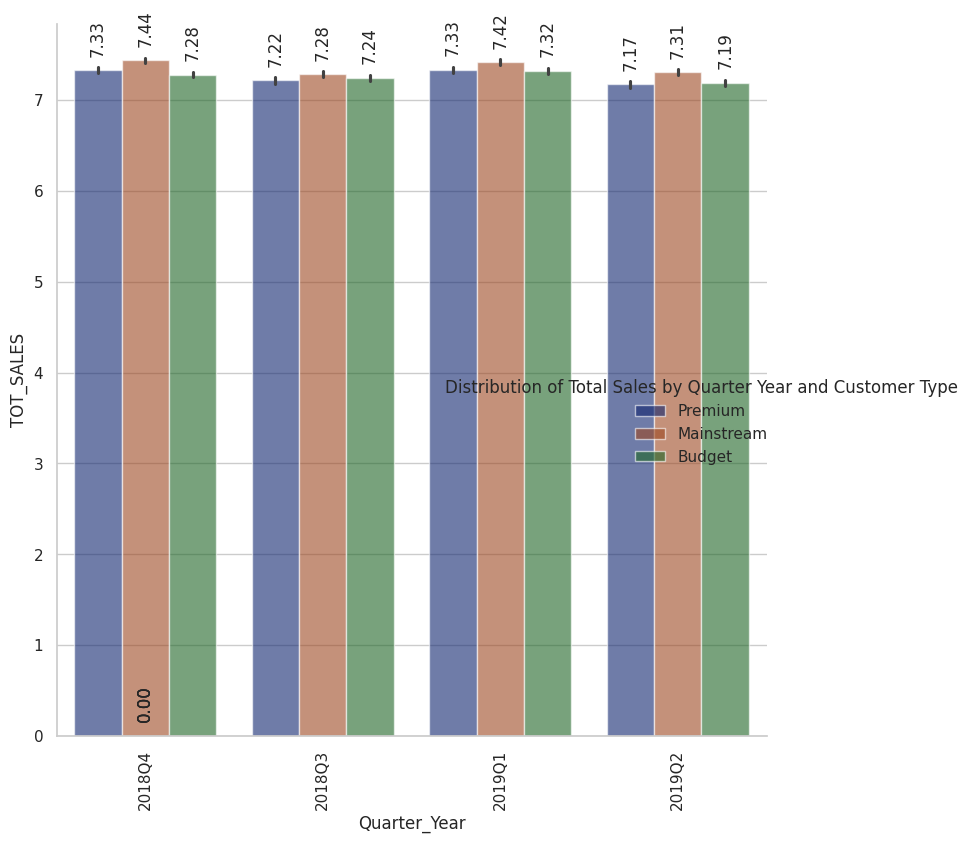

In [48]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Quarter_Year", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Quarter_Year", "TOT_SALES")
g.legend.set_title("Distribution of Total Sales by Quarter Year and Customer Type")

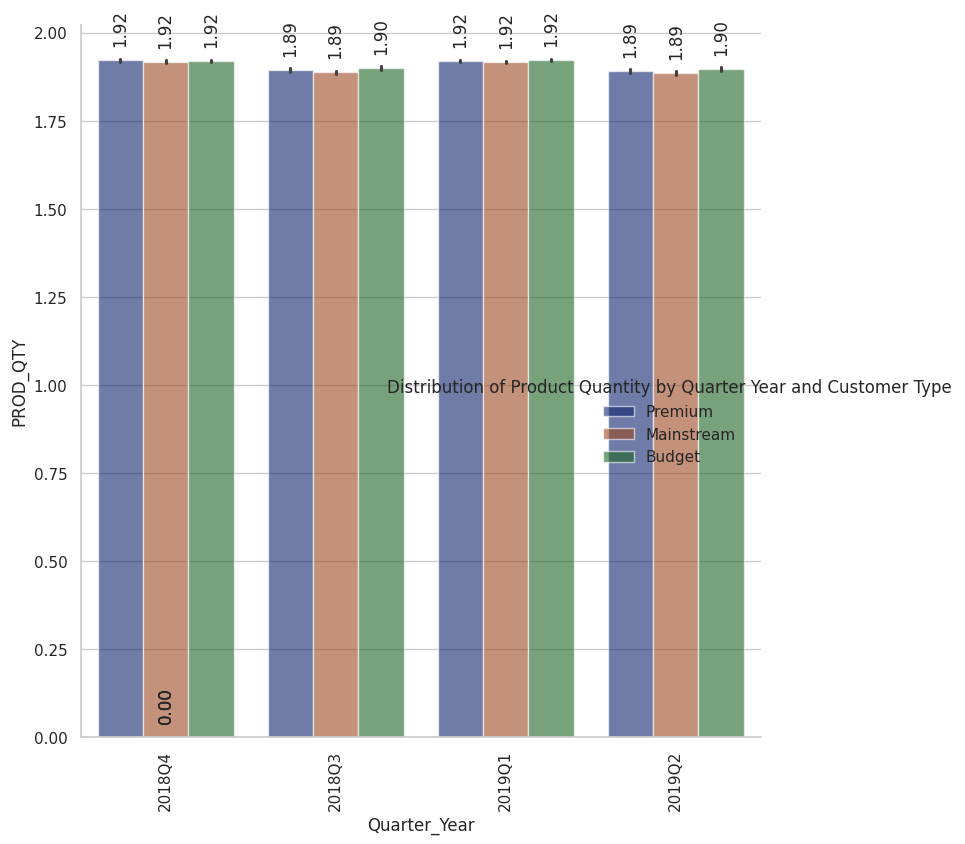

In [49]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Quarter_Year", y="PROD_QTY", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Quarter_Year", "PROD_QTY")
g.legend.set_title("Distribution of Product Quantity by Quarter Year and Customer Type")

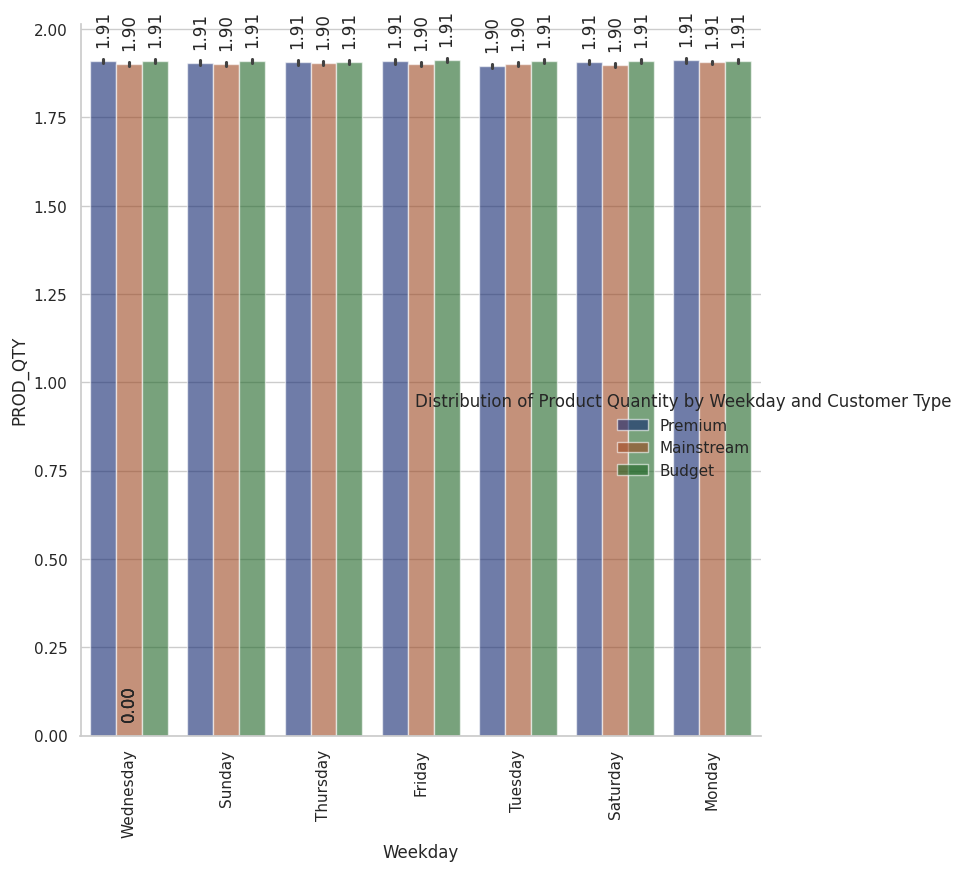

In [50]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Weekday", y="PROD_QTY", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Weekday", "PROD_QTY")
g.legend.set_title("Distribution of Product Quantity by Weekday and Customer Type")

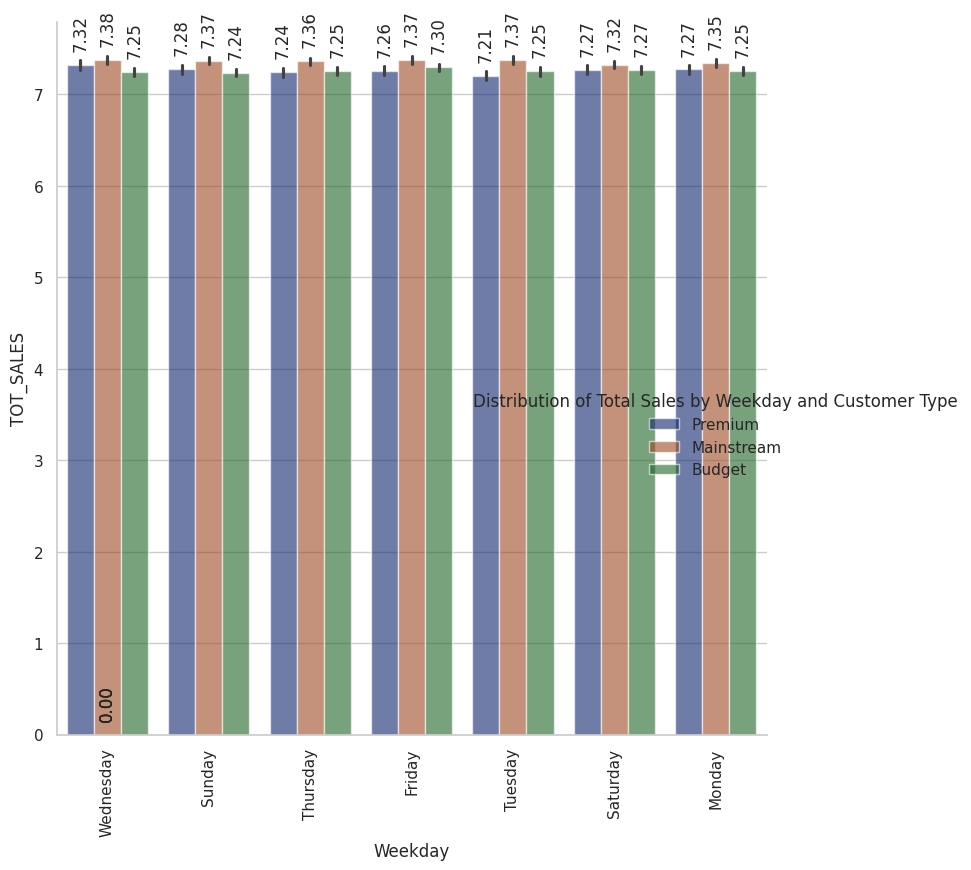

In [51]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Weekday", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Weekday", "TOT_SALES")
g.legend.set_title("Distribution of Total Sales by Weekday and Customer Type")

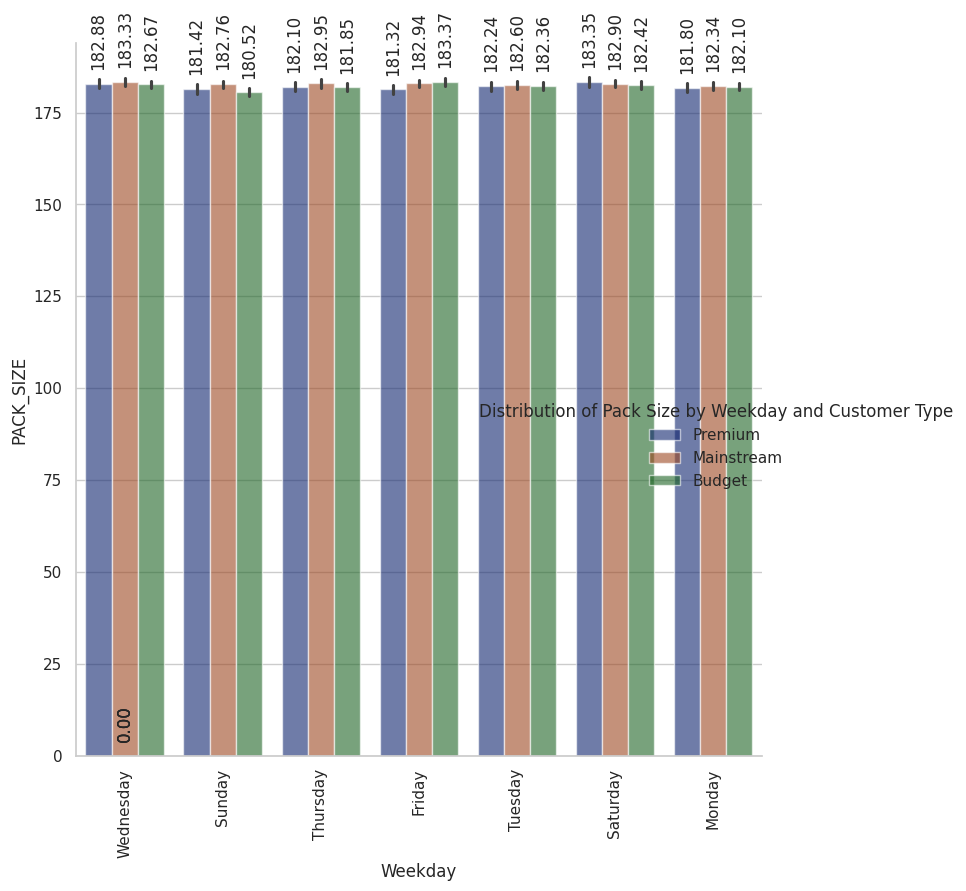

In [52]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=data, kind="bar",
    x="Weekday", y="PACK_SIZE", hue="PREMIUM_CUSTOMER", palette="dark", alpha=0.6, height=8, aspect=1.0
)


for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', rotation=90)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Weekday", "PACK_SIZE")
g.legend.set_title("Distribution of Pack Size by Weekday and Customer Type")

<Axes: >

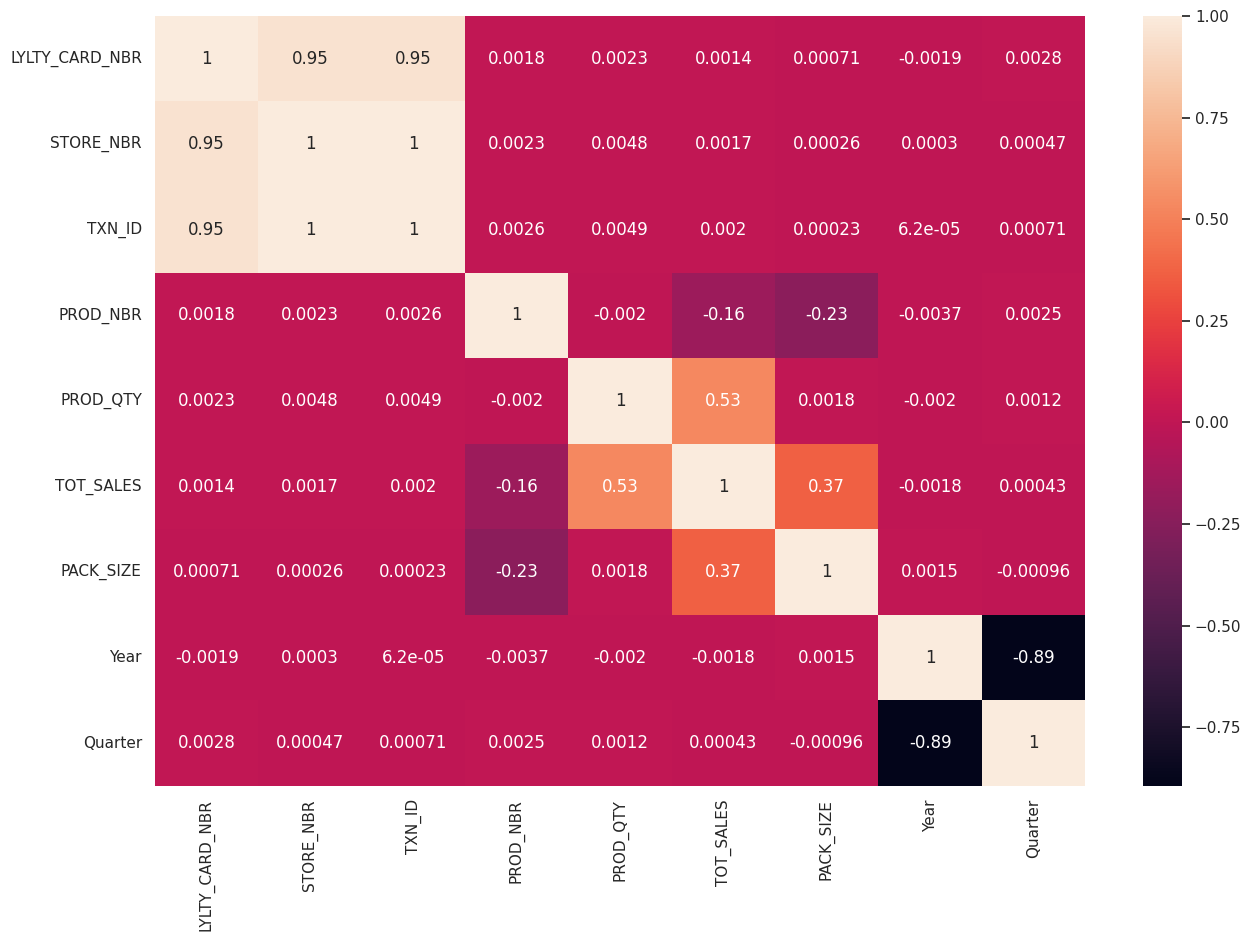

In [54]:
plt.figure(figsize=(15, 10))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True)

3. Experimenting and Uplift Testing

In [55]:
total_sales=data.groupby(["STORE_NBR", "Month_Year"])["TOT_SALES"].sum()
total_sales=total_sales.to_frame()
total_sales.head(15)

TOT_SALES
STORE_NBR Month_Year               
1         April 2019          192.9
          August 2018         176.1
          December 2018       189.6
          February 2019       225.4
          January 2019        154.8
          July 2018           206.9
          June 2019           174.1
          March 2019          192.9
          May 2019            221.4
          November 2018       192.6
          October 2018        188.1
          September 2018      278.8
2         April 2019          196.5
          August 2018         193.8
          December 2018       136.0

In [56]:
total_customers=data.groupby(["STORE_NBR", "Month_Year"])["LYLTY_CARD_NBR"].nunique()
total_customers=total_customers.to_frame()
total_customers.head(15)

LYLTY_CARD_NBR
STORE_NBR Month_Year                    
1         April 2019                  42
          August 2018                 42
          December 2018               42
          February 2019               52
          January 2019                35
          July 2018                   49
          June 2019                   42
          March 2019                  45
          May 2019                    46
          November 2018               46
          October 2018                44
          September 2018              59
2         April 2019                  47
          August 2018                 39
          December 2018               35

In [57]:
total_customers=data.groupby(["STORE_NBR", "Month_Year"])["LYLTY_CARD_NBR"].nunique()
total_customers=total_customers.to_frame()
total_customers.head(15)

LYLTY_CARD_NBR
STORE_NBR Month_Year                    
1         April 2019                  42
          August 2018                 42
          December 2018               42
          February 2019               52
          January 2019                35
          July 2018                   49
          June 2019                   42
          March 2019                  45
          May 2019                    46
          November 2018               46
          October 2018                44
          September 2018              59
2         April 2019                  47
          August 2018                 39
          December 2018               35

In [58]:
transactions_per_customer=data.groupby(["STORE_NBR", "Month_Year"])["TXN_ID"].nunique()/data.groupby(["STORE_NBR", "Month_Year"])["LYLTY_CARD_NBR"].nunique()
#Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and counting the unique number of transactions per customer for them.
transactions_per_customer=transactions_per_customer.to_frame()
transactions_per_customer.head(15)

0
STORE_NBR Month_Year              
1         April 2019      1.023810
          August 2018     1.023810
          December 2018   1.119048
          February 2019   1.057692
          January 2019    1.028571
          July 2018       1.061224
          June 2019       1.000000
          March 2019      1.088889
          May 2019        1.108696
          November 2018   1.021739
          October 2018    1.022727
          September 2018  1.050847
2         April 2019      1.042553
          August 2018     1.102564
          December 2018   1.057143

In [59]:
dataframe_list=[total_sales, total_customers, transactions_per_customer]
dataframe=pd.concat(dataframe_list, axis=1)
dataframe.columns=["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"]
dataframe.head(15)

TOT_SALES  TOT_CUST  TXN_PER_CUST
STORE_NBR Month_Year                                       
1         April 2019          192.9        42      1.023810
          August 2018         176.1        42      1.023810
          December 2018       189.6        42      1.119048
          February 2019       225.4        52      1.057692
          January 2019        154.8        35      1.028571
          July 2018           206.9        49      1.061224
          June 2019           174.1        42      1.000000
          March 2019          192.9        45      1.088889
          May 2019            221.4        46      1.108696
          November 2018       192.6        46      1.021739
          October 2018        188.1        44      1.022727
          September 2018      278.8        59      1.050847
2         April 2019          196.5        47      1.042553
          August 2018         193.8        39      1.102564
          December 2018       136.0        35      1.057143

In [60]:
dataframe.isnull().sum()

,0
TOT_SALES,0
TOT_CUST,0
TXN_PER_CUST,0


In [61]:
recorded_stores=pd.pivot_table(data, index="STORE_NBR", columns="Month_Year", values="TXN_ID", aggfunc="count")
recorded_stores

Month_Year,April 2019,August 2018,December 2018,February 2019,January 2019,July 2018,June 2019,March 2019,May 2019,November 2018,October 2018,September 2018
STORE_NBR,,,,,,,,,,,,
1,43.0,43.0,47.0,55.0,36.0,52.0,43.0,49.0,51.0,47.0,45.0,62.0
2,49.0,43.0,38.0,32.0,45.0,41.0,42.0,46.0,50.0,40.0,43.0,37.0
3,110.0,134.0,129.0,139.0,121.0,138.0,122.0,130.0,123.0,118.0,119.0,119.0
4,137.0,151.0,133.0,102.0,168.0,160.0,134.0,135.0,126.0,139.0,155.0,138.0
5,109.0,112.0,125.0,106.0,118.0,120.0,127.0,97.0,104.0,111.0,107.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,50.0,54.0,43.0,37.0,38.0,52.0,40.0,47.0,52.0,51.0,48.0,34.0
269,139.0,132.0,133.0,133.0,144.0,139.0,127.0,122.0,130.0,136.0,148.0,124.0
270,132.0,154.0,149.0,125.0,155.0,139.0,127.0,143.0,128.0,133.0,119.0,126.0


In [62]:
recorded_stores.isnull().sum()

,0
Month_Year,
April 2019,7
August 2018,9
December 2018,9
February 2019,8
January 2019,9
July 2018,6
June 2019,8
March 2019,7
May 2019,9


In [63]:
unrecorded_stores=[]
for i in recorded_stores.index:
    if recorded_stores.loc[i].isnull().any():
        unrecorded_stores.append(i)
unrecorded_stores

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [64]:
dataframe=dataframe.drop(unrecorded_stores, axis=0)
dataframe

TOT_SALES  TOT_CUST  TXN_PER_CUST
STORE_NBR Month_Year                                       
1         April 2019          192.9        42      1.023810
          August 2018         176.1        42      1.023810
          December 2018       189.6        42      1.119048
          February 2019       225.4        52      1.057692
          January 2019        154.8        35      1.028571
...                             ...       ...           ...
272       March 2019          442.3        50      1.060000
          May 2019            314.6        34      1.176471
          November 2018       376.2        41      1.097561
          October 2018        430.6        44      1.136364
          September 2018      304.7        32      1.125000

[3120 rows x 3 columns]

A. Pre-Trial Duration -- Before February 2019

In [65]:
pre_trial_data = dataframe.loc[pd.to_datetime(dataframe.index.get_level_values("Month_Year"), format="%B %Y") < "2019-02"]

In [66]:
pre_trial_data=pre_trial_data.reset_index()

In [67]:
pre_trial_data

,STORE_NBR,Month_Year,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,1,August 2018,176.1,42,1.023810
1,1,December 2018,189.6,42,1.119048
2,1,January 2019,154.8,35,1.028571
3,1,July 2018,206.9,49,1.061224
4,1,November 2018,192.6,46,1.021739
...,...,...,...,...,...
1815,272,January 2019,423.0,46,1.086957
1816,272,July 2018,433.1,48,1.083333
1817,272,November 2018,376.2,41,1.097561
1818,272,October 2018,430.6,44,1.136364


In [68]:
control_stores=pre_trial_data[(pre_trial_data.STORE_NBR!=77 ) & (pre_trial_data.STORE_NBR!=86) & (pre_trial_data.STORE_NBR!=88)][["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"]].groupby(pre_trial_data.STORE_NBR).sum()
control_stores

,TOT_SALES,TOT_CUST,TXN_PER_CUST
STORE_NBR,,,
1,1386.90,317,7.327967
2,1128.50,272,7.359700
3,7526.15,744,8.209829
4,9127.00,849,8.535253
5,5739.70,651,8.791906
...,...,...,...
268,1549.05,304,7.373037
269,6664.50,746,8.921035
270,6697.95,734,9.147187


In [69]:
trial_stores=pre_trial_data[(pre_trial_data.STORE_NBR==77 ) | (pre_trial_data.STORE_NBR==86) | (pre_trial_data.STORE_NBR==88)][["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"]].groupby(pre_trial_data.STORE_NBR).sum()
trial_stores

,TOT_SALES,TOT_CUST,TXN_PER_CUST
STORE_NBR,,,
77,1699.00,299,7.405289
86,6119.85,697,8.798544
88,9383.60,880,8.523817


Store Number : 77

In [70]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[77], method="pearson", axis=1).nlargest(5).index]

difference=(trial_stores.loc[77]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
139,1493.2,257.0,0.405289,609.34
135,1486.9,256.0,0.012432,603.04
161,1459.0,252.0,0.405289,575.14
233,39.2,1.0,0.115969,-844.66
46,-59.0,-3.0,0.094215,-942.86


Store Number : 86

In [71]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[86], axis=1).nlargest(5).index]
difference=(trial_stores.loc[86]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
258,5934.85,670.0,1.798544,4066.46
215,3411.85,386.0,1.486773,1543.46
225,29.25,3.0,0.023669,-1839.14
196,-6.45,1.0,0.040716,-1874.84
57,-27.55,-2.0,0.031815,-1895.94



Store Number : 88

In [72]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[88], axis=1).nlargest(5).index]

difference=(trial_stores.loc[88]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
60,1697.1,154.0,0.052504,783.5
75,1420.1,129.0,0.078986,506.5
72,865.1,79.0,0.085871,-48.5
203,439.9,38.0,0.135139,-473.7
165,145.8,18.0,0.093389,-767.8


For STORE_NBR 88, we can see that STORE_NBR 165 would be the most suitable control store.

In [73]:
trial_stores_one=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([77])].reset_index()
trial_stores_two=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([86])].reset_index()
trial_stores_three=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([88])].reset_index()

In [74]:
control_stores_one=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([46])].reset_index()
control_stores_two=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([57])].reset_index()
control_stores_three=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([165])].reset_index()

In [75]:
stores=pd.concat([trial_stores_one, trial_stores_two, trial_stores_three, control_stores_one, control_stores_two, control_stores_three], axis=0)    #   Concatenating all the pandas.DataFrames into one.
stores

,index,STORE_NBR,Month_Year,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,504,77,August 2018,255.50,47,1.021277
1,505,77,December 2018,267.30,46,1.043478
2,506,77,January 2019,204.40,35,1.114286
3,507,77,July 2018,296.80,51,1.078431
4,508,77,November 2018,245.30,41,1.073171
5,509,77,October 2018,204.50,37,1.027027
6,510,77,September 2018,225.20,42,1.047619
0,560,86,August 2018,764.05,94,1.170213
1,561,86,December 2018,841.20,98,1.224490
2,562,86,January 2019,841.40,94,1.372340


<ipython-input-76-62e52c6459f0>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-76-62e52c6459f0>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-76-62e52c6459f0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




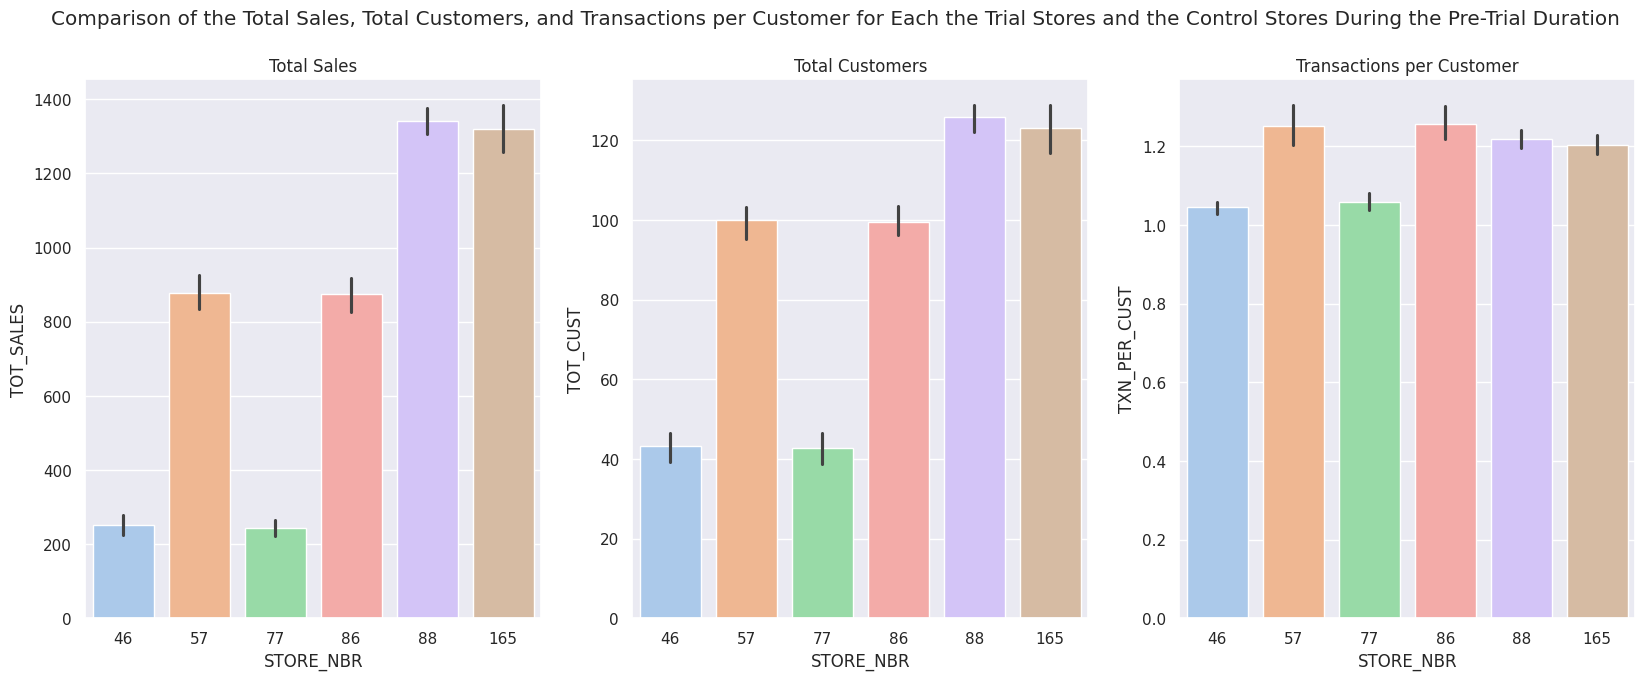

In [76]:
sns.set_style("darkgrid")
figure, axis=plt.subplots(1, 3, figsize=(20, 7))
sns.barplot(x="STORE_NBR", y="TOT_SALES", data=stores, ax=axis[0], palette="pastel")
axis[0].set_title("Total Sales")
sns.barplot(x="STORE_NBR", y="TOT_CUST", data=stores, ax=axis[1], palette="pastel")
axis[1].set_title("Total Customers")
sns.barplot(x="STORE_NBR", y="TXN_PER_CUST", data=stores, ax=axis[2], palette="pastel")
axis[2].set_title("Transactions per Customer")
figure.suptitle("Comparison of the Total Sales, Total Customers, and Transactions per Customer for Each the Trial Stores and the Control Stores During the Pre-Trial Duration")
plt.show()

While the other trial stores performed the same as their corresponding control stores, we can see, however, that STORE_NBR 88 slightly out-performed its control store in all attributes. We can also notice that STORE_NBR 86 and 88 show a significant difference in terms of the total sales, but this isn't the case with STORE_NBR 77, whose sales are considerably less.

In [77]:
trial_data = dataframe.loc[pd.to_datetime(dataframe.index.get_level_values("Month_Year"), format="%B %Y") >= "2019-02"]
trial_data=trial_data.reset_index()
trial_data

,STORE_NBR,Month_Year,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,1,April 2019,192.9,42,1.023810
1,1,February 2019,225.4,52,1.057692
2,1,June 2019,174.1,42,1.000000
3,1,March 2019,192.9,45,1.088889
4,1,May 2019,221.4,46,1.108696
...,...,...,...,...,...
1295,272,April 2019,445.1,54,1.018519
1296,272,February 2019,395.5,45,1.066667
1297,272,June 2019,312.1,34,1.088235
1298,272,March 2019,442.3,50,1.060000


In [78]:
trial_stores_one=trial_data.loc[trial_data.STORE_NBR.isin([77])].reset_index()
trial_stores_two=trial_data.loc[trial_data.STORE_NBR.isin([86])].reset_index()
trial_stores_three=trial_data.loc[trial_data.STORE_NBR.isin([88])].reset_index()

In [79]:
control_stores_one=trial_data.loc[trial_data.STORE_NBR.isin([46])].reset_index()
control_stores_two=trial_data.loc[trial_data.STORE_NBR.isin([57])].reset_index()
control_stores_three=trial_data.loc[trial_data.STORE_NBR.isin([165])].reset_index()

In [80]:
stores=pd.concat([trial_stores_one, trial_stores_two, trial_stores_three, control_stores_one, control_stores_two, control_stores_three], axis=0)
stores

,index,STORE_NBR,Month_Year,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,360,77,April 2019,263.50,47,1.021277
1,361,77,February 2019,235.00,45,1.000000
2,362,77,June 2019,264.70,41,1.024390
3,363,77,March 2019,278.50,50,1.100000
4,364,77,May 2019,299.30,55,1.018182
0,400,86,April 2019,848.20,105,1.200000
1,401,86,February 2019,913.20,107,1.289720
2,402,86,June 2019,838.00,98,1.204082
3,403,86,March 2019,1026.80,115,1.217391
4,404,86,May 2019,889.30,104,1.230769


<ipython-input-81-a41c2b3e9dac>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-81-a41c2b3e9dac>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-81-a41c2b3e9dac>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




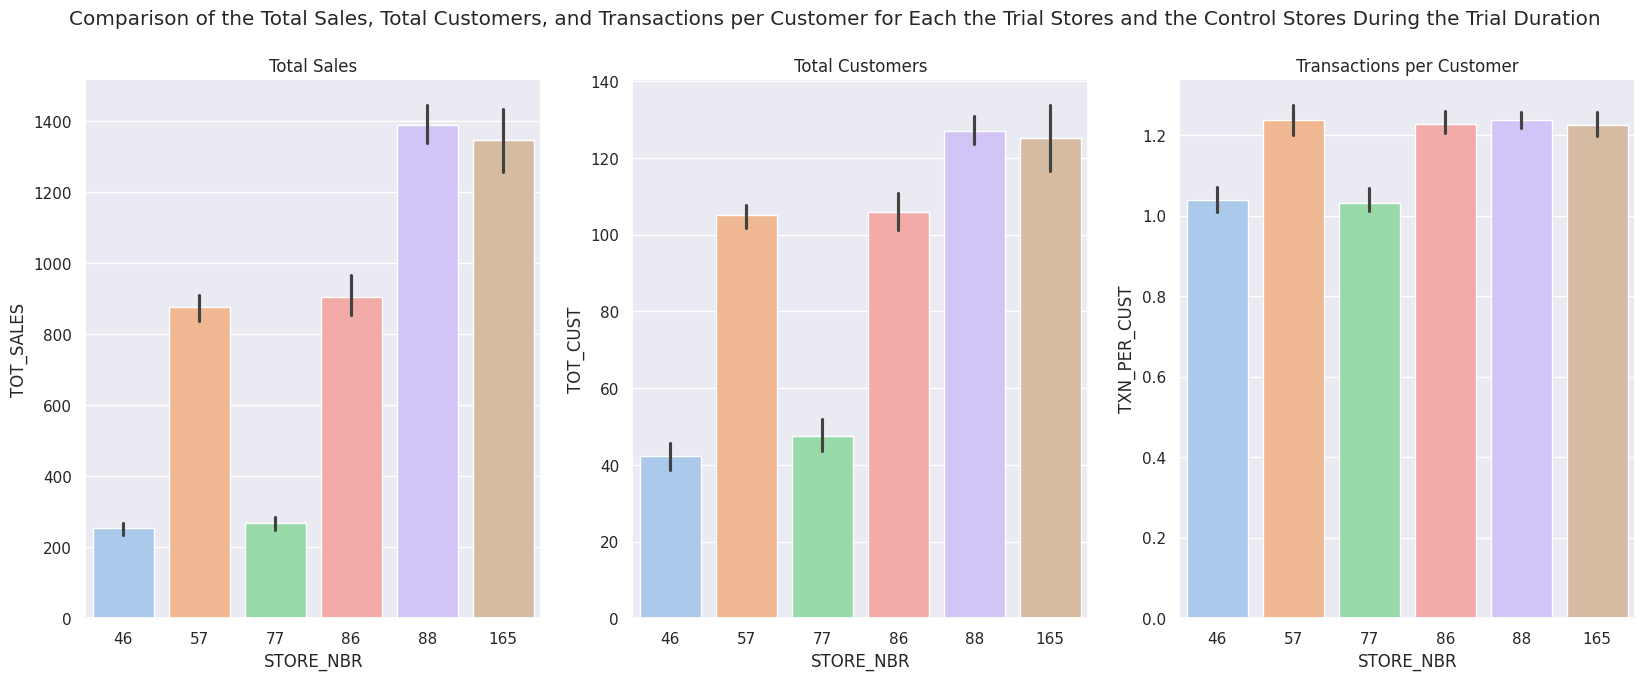

In [81]:
sns.set_style("darkgrid")
figure, axis=plt.subplots(1, 3, figsize=(20, 7))
sns.barplot(x="STORE_NBR", y="TOT_SALES", data=stores, ax=axis[0], palette="pastel")
axis[0].set_title("Total Sales")
sns.barplot(x="STORE_NBR", y="TOT_CUST", data=stores, ax=axis[1], palette="pastel")
axis[1].set_title("Total Customers")
sns.barplot(x="STORE_NBR", y="TXN_PER_CUST", data=stores, ax=axis[2], palette="pastel")
axis[2].set_title("Transactions per Customer")
figure.suptitle("Comparison of the Total Sales, Total Customers, and Transactions per Customer for Each the Trial Stores and the Control Stores During the Trial Duration")
plt.show()

We can, notice that STORE_NBR 88 slightly out-performs its control store, STORE_NBR 165, and still remains the best implementation of the trial of all the trial stores. The driver for this seems to be the purchasing customers rather than purchases per customer, as we can see that with the increase in the total customers, there's also an increase in the total sales almost identically, but the transactions per customer seem to be reasonably high for all the trial stores regardless of the total sales.
Conclusion
--> While the other trial stores performed the same as their corresponding control stores, we can see, however, that STORE_NBR 88 slightly out-performed its control store, STORE_NBR 165, in all attributes.
--> STORE_NBR 86 and 88 show a significant difference in terms of the total sales, but this isn't the case with STORE_NBR 77, which may be because of the way the trial was implemented for it.
--> Due to the maximum difference in the total sales of all the trial stores, STORE_NBR 88 remains the best implementation of the trial.
--> The driver for the increase in total sales seems to be the purchasing customers rather than purchases per customer — the more the customers, the higher the sales.